# Importing The Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

# Importing The Dataset

In [2]:
Stock_hdfc = pd.read_csv('HDFC_FINAL.csv',  index_col=0)

df_Stock_hdfc = Stock_hdfc
#df_Stock_hdfc = df_Stock_hdfc.rename(columns={'HDFC_Close(t)':'Close'})
df_Stock_hdfc.head()

,Open,High,Low,HDFC_Close(t),Volume,SD20,Upper_Band,Lower_Band,HDFC_Close(t-1),HDFC_Close(t-2),...,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2011-09-16,243.125000,245.000000,238.149994,241.850006,5473504,6.762994,247.223489,220.171512,242.324997,239.449997,...,37,0,0,0,0,0,0,0,2011,9
2011-09-19,240.949997,243.500000,238.550003,242.375000,4194610,7.003161,248.262574,220.249928,241.850006,242.324997,...,38,0,0,0,0,0,0,0,2011,9
2011-09-20,242.500000,246.625000,241.500000,245.675003,5917634,7.383917,249.786585,220.250916,242.375000,241.850006,...,38,0,0,0,0,0,0,0,2011,9
2011-09-21,246.375000,248.824997,244.199997,247.250000,6445698,7.580813,251.216627,220.893376,245.675003,242.375000,...,38,0,0,0,0,0,0,0,2011,9
2011-09-22,243.949997,244.500000,232.750000,236.149994,5095544,7.431967,251.241435,221.513567,247.250000,245.675003,...,38,0,0,0,0,0,0,0,2011,9


In [3]:
Stock_bhpl = pd.read_csv('BHARAT_PETROLEUM_FINAL.csv',  index_col=0)

df_Stock_bhpl = Stock_bhpl
#df_Stock_bhpl = df_Stock_bhpl.rename(columns={'BHARAT_PETROLEUM_Close(t)':'Close'})
df_Stock_bhpl.head()

,Open,High,Low,BHARAT_PETROLEUM_Close(t),Volume,SD20,Upper_Band,Lower_Band,Bharat Petroleum_Close(t-1),Bharat Petroleum_Close(t-2),...,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2011-09-16,229.846664,231.199997,223.486664,224.193329,8211097,4.114019,239.858038,223.401961,228.473328,231.059998,...,37,0,0,0,0,0,0,0,2011,9
2011-09-19,223.333328,223.800003,220.133331,220.653336,4992840,4.700258,240.309183,221.508149,224.193329,228.473328,...,38,0,0,0,0,0,0,0,2011,9
2011-09-20,220.000000,221.826660,217.353333,218.706665,8540872,5.246042,241.123084,220.138916,220.653336,224.193329,...,38,0,0,0,0,0,0,0,2011,9
2011-09-21,220.000000,222.266663,216.800003,218.026672,6039802,5.950725,241.989784,218.186882,218.706665,220.653336,...,38,0,0,0,0,0,0,0,2011,9
2011-09-22,215.866669,216.593338,213.466660,213.833328,4292655,6.854219,242.747436,215.330562,218.026672,218.706665,...,38,0,0,0,0,0,0,0,2011,9


In [4]:
Stock_cipla = pd.read_csv('CIPLA_FINAl.csv',  index_col=0)

df_Stock_cipla = Stock_cipla
#df_Stock_cipla = df_Stock_cipla.rename(columns={'CIPLA_Close(t)':'Close'})
df_Stock_cipla.head()

,Open,High,Low,CIPLA_Close(t),Volume,SD20,Upper_Band,Lower_Band,Cipla_Close(t-1),Cipla_Close(t-2),...,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2011-09-16,284.000000,287.850006,281.549988,282.700012,706838,4.787974,292.563450,273.411553,284.049988,282.200012,...,37,0,0,0,0,0,0,0,2011,9
2011-09-19,283.500000,283.500000,274.649994,277.250000,1715520,4.939488,292.503978,272.746025,282.700012,284.049988,...,38,0,0,0,0,0,0,0,2011,9
2011-09-20,278.649994,283.000000,277.049988,282.399994,928700,4.906447,292.305397,272.679607,277.250000,282.700012,...,38,0,0,0,0,0,0,0,2011,9
2011-09-21,282.350006,285.899994,281.000000,283.500000,680118,4.587921,291.343344,272.991660,282.399994,277.250000,...,38,0,0,0,0,0,0,0,2011,9
2011-09-22,281.000000,284.200012,276.350006,277.750000,876968,4.692965,291.330931,272.559071,283.500000,282.399994,...,38,0,0,0,0,0,0,0,2011,9


In [5]:
Stock_coroml = pd.read_csv('COROMANDEL_FINAL.csv',  index_col=0)

df_Stock_coroml = Stock_coroml
#df_Stock_coroml = df_Stock_coroml.rename(columns={'coroml_Close(t)':'Close'})
df_Stock_coroml.head()

,Open,High,Low,COROMANDEL_Close(t),Volume,SD20,Upper_Band,Lower_Band,Coromandel_Close(t-1),Coromandel_Close(t-2),...,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2011-09-16,315.299988,329.950012,307.450012,324.200012,409636,9.795728,326.703957,287.521046,306.399994,300.200012,...,37,0,0,0,0,0,0,0,2011,9
2011-09-19,318.000000,318.000000,308.700012,309.649994,62561,9.610628,326.033758,287.591245,324.200012,306.399994,...,38,0,0,0,0,0,0,0,2011,9
2011-09-20,314.500000,317.899994,310.000000,312.200012,64223,9.315916,325.136834,287.873170,309.649994,324.200012,...,38,0,0,0,0,0,0,0,2011,9
2011-09-21,314.850006,320.000000,309.000000,309.850006,104925,8.721751,323.393503,288.506500,312.200012,309.649994,...,38,0,0,0,0,0,0,0,2011,9
2011-09-22,306.750000,312.000000,302.100006,303.899994,32327,7.943061,320.966124,289.193879,309.850006,312.200012,...,38,0,0,0,0,0,0,0,2011,9


In [6]:
Stock_tcs = pd.read_csv('TCS_FINAL.csv',  index_col=0)

df_Stock_tcs = Stock_tcs
#df_Stock_tcs = df_Stock_tcs.rename(columns={'tcs_Close(t)':'Close'})
df_Stock_tcs.head()

,Open,High,Low,TCS_Close(t),Volume,SD20,Upper_Band,Lower_Band,TCS_Close(t-1),TCS_Close(t-2),...,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2011-09-16,524.000000,536.200012,510.649994,513.875000,4656504,19.860088,538.351425,458.911072,520.875000,507.549988,...,37,0,0,0,0,0,0,0,2011,9
2011-09-19,510.750000,516.250000,506.250000,509.024994,2240234,19.545583,539.114916,460.932582,513.875000,520.875000,...,38,0,0,0,0,0,0,0,2011,9
2011-09-20,511.049988,532.000000,511.049988,528.974976,3487986,18.673109,540.594965,465.902529,509.024994,513.875000,...,38,0,0,0,0,0,0,0,2011,9
2011-09-21,533.974976,533.974976,518.450012,521.750000,2740760,15.918955,538.222908,474.547087,528.974976,509.024994,...,38,0,0,0,0,0,0,0,2011,9
2011-09-22,511.500000,517.000000,493.100006,497.200012,3141570,15.651254,538.007506,475.402492,521.750000,528.974976,...,38,0,0,0,0,0,0,0,2011,9


# Train Test Split

In [7]:
def create_train_test_set(df_Stock):
    
    features = df_Stock.drop(df_Stock.columns[3], axis=1)
    target = df_Stock.iloc[:,3]
    #df_Stock = df_Stock.drop(columns= ['Date_Col'], axis = 1, inplace = True)

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.90)
    print('Training Set length - ', str(train_split))

    #test_split = train_split + int(data_len * 0.10)
    #print('Validat Set length - ', str(int(data_len * 0.1)))

    print('Testing Set length - ', str(int(data_len * 0.10)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_test = features[:train_split], features[train_split:]
    Y_train, Y_test = target[:train_split], target[train_split:]

    #print shape of samples
    print(X_train.shape, X_test.shape)
    print(Y_train.shape, Y_test.shape)
    
    X_train.reset_index(inplace = True)
    X_train.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)
    
    X_test.reset_index(inplace = True)
    X_test.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)
    
    
    return X_train, X_test, Y_train, Y_test

In [8]:
X_train_hdfc, X_test_hdfc, Y_train_hdfc, Y_test_hdfc = create_train_test_set(df_Stock_hdfc)

Historical Stock Data length is -  2760
Training Set length -  2484
Testing Set length -  276
(2484, 63) (276, 63)
(2484,) (276,)


C:\Users\HP\AppData\Local\Temp\ipykernel_14044\2443111095.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14044\2443111095.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)


In [9]:
X_train_bhpl, X_test_bhpl, Y_train_bhpl, Y_test_bhpl = create_train_test_set(df_Stock_bhpl)

Historical Stock Data length is -  2760
Training Set length -  2484
Testing Set length -  276
(2484, 63) (276, 63)
(2484,) (276,)


C:\Users\HP\AppData\Local\Temp\ipykernel_14044\2443111095.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14044\2443111095.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)


In [10]:
X_train_cipla, X_test_cipla, Y_train_cipla, Y_test_cipla = create_train_test_set(df_Stock_cipla)

Historical Stock Data length is -  2760
Training Set length -  2484
Testing Set length -  276
(2484, 63) (276, 63)
(2484,) (276,)


C:\Users\HP\AppData\Local\Temp\ipykernel_14044\2443111095.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14044\2443111095.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)


In [11]:
X_train_coroml, X_test_coroml, Y_train_coroml, Y_test_coroml = create_train_test_set(df_Stock_coroml)

Historical Stock Data length is -  2760
Training Set length -  2484
Testing Set length -  276
(2484, 63) (276, 63)
(2484,) (276,)


C:\Users\HP\AppData\Local\Temp\ipykernel_14044\2443111095.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14044\2443111095.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)


In [12]:
X_train_tcs, X_test_tcs, Y_train_tcs, Y_test_tcs = create_train_test_set(df_Stock_tcs)

Historical Stock Data length is -  2760
Training Set length -  2484
Testing Set length -  276
(2484, 63) (276, 63)
(2484,) (276,)


C:\Users\HP\AppData\Local\Temp\ipykernel_14044\2443111095.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14044\2443111095.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = ['Date','Date_Col'], axis= 1, inplace = True)


# Model Fitting

In [13]:
from sklearn.linear_model import LinearRegression

In [24]:
def Linear_Regression(X_train, Y_train, X_test, Y_test):
    
    
    lr = LinearRegression()
    lr.fit(X_train, Y_train.values)
    print('LR Coefficients: \n', lr.coef_)
    print('LR Intercept: \n', lr.intercept_)
    print("Performance (R^2): ", lr.score(X_train, Y_train.values))
    print('----------------------------------------------------------------------')
    
    Y_train_pred = lr.predict(X_train)
    Y_test_pred = lr.predict(X_test)
    print("Training R-squared: ",round(metrics.r2_score(Y_train.values,Y_train_pred),2))
    print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train.values,Y_train_pred), 2)) 
    print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train.values,Y_train_pred)),2))
    print("Training MAE: ",round(metrics.mean_absolute_error(Y_train.values,Y_train_pred),2))
    
    print(' ')

    print("Testing R-squared: ",round(metrics.r2_score(Y_test.values,Y_test_pred),2))
    print('Testing Mean Squared Error:', round(metrics.mean_squared_error(Y_test.values,Y_test_pred), 2)) 
    print("Testing RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test.values,Y_test_pred)),2))
    print("Testing MAE: ",round(metrics.mean_absolute_error(Y_test.values,Y_test_pred),2))
    
    print(' ')
    
    df_pred = pd.DataFrame(Y_test.values, columns=['Actual'], index=Y_test.index)
    df_pred['Predicted'] = Y_test_pred
    df_pred = df_pred.reset_index()
    df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
    
    df_pred[['Actual', 'Predicted']].plot(figsize = (12,8))
    
    return df_pred


### HDFC

LR Coefficients: 
 [-3.09672295e-02  5.13053378e-02  3.14993046e-02 -1.72601193e-08
 -5.01738594e-04 -4.87194909e-03 -2.86477987e-03 -4.95689657e-01
 -2.71496040e-01 -1.00662262e-01 -2.23921982e-03 -9.00725560e-03
 -1.14399431e+00 -5.36251937e-01 -3.86839245e-03 -5.91078905e-02
 -3.81975510e-03  2.74356683e-01 -4.22699777e-01  7.16154434e-01
  7.16154434e-01  7.16154434e-01  7.16154434e-01  7.16154434e-01
 -7.99074053e-03  1.26066972e-03 -4.09152490e-10 -1.06199884e-02
  7.27962403e-04  3.05675347e-03  3.05675333e-03  4.15152884e+00
  3.17941762e-04 -9.08874002e-04  3.78058538e-04 -6.10904551e-04
  2.28436747e-04 -6.91531574e-04  7.13145950e-04  1.82050821e-04
 -9.98910229e-05  1.78159882e-05  3.15993894e-05  3.07179907e-05
  2.87361658e-04 -2.98176366e-04  1.03584247e-09  1.00718434e-10
  1.10220266e-03  1.48690095e-02  1.76090881e-02 -1.47043818e-02
  2.39188306e-03  4.03664840e-02 -5.73331655e-02  5.86454455e-02
  2.76142441e-02  1.20697919e-01  2.22223494e-01  6.83952286e-02
  9.23

,Date,Actual,Predicted
0,2021-10-20,1673.849976,1675.616842
1,2021-10-21,1676.300049,1673.460497
2,2021-10-22,1680.750000,1681.536914
3,2021-10-25,1657.000000,1655.325237
4,2021-10-26,1652.750000,1653.170082
...,...,...,...
271,2022-11-23,1599.150024,1599.195927
272,2022-11-24,1625.150024,1622.857694
273,2022-11-25,1617.650024,1616.898463
274,2022-11-28,1600.250000,1599.413119


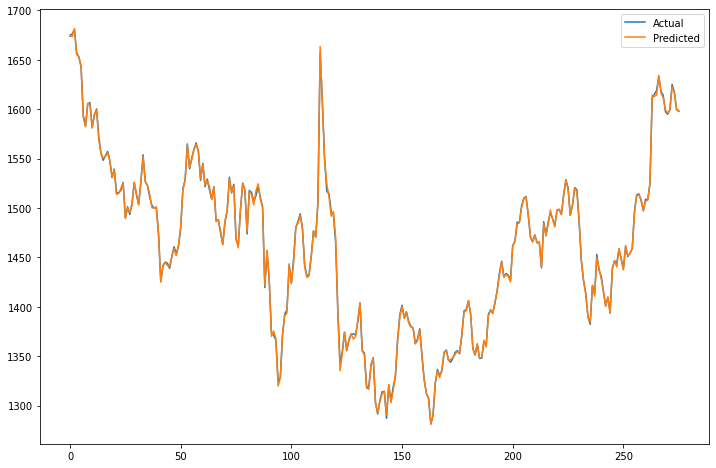

In [25]:
Linear_Regression(X_train_hdfc, Y_train_hdfc, X_test_hdfc, Y_test_hdfc)

### Bharat Petrolium

LR Coefficients: 
 [-2.86980357e-02  4.57487776e-02  2.70730736e-02 -4.45283718e-10
  2.08340483e-04 -2.01152484e-03 -2.84488686e-03 -5.21928448e-01
 -2.77836211e-01 -1.12428783e-01  2.57969629e-04  9.19597019e-03
 -1.18584834e+00 -5.41613168e-01 -2.42820581e-03 -4.96902130e-02
 -3.41332700e-03  3.17103851e-01 -4.23018561e-01  7.28272475e-01
  7.28272475e-01  7.28272475e-01  7.28272475e-01  7.28272475e-01
 -7.14662760e-04 -7.19319552e-04 -3.15525384e-13  6.89699824e-04
  1.43826749e-03  5.59500096e-04  5.59500097e-04 -2.84034950e-01
  1.27768741e-04 -6.47837734e-05  6.26007194e-06  3.59074625e-04
 -5.54678666e-04  1.17701440e-04  9.60409989e-06 -4.43230935e-06
 -8.04648588e-06 -3.43237439e-06 -5.99625777e-05  1.02412734e-04
 -3.42785307e-05  7.77083658e-06  4.75977591e-11  1.04094511e-12
  4.40436037e-03  1.34332988e-03 -3.52589260e-03 -1.30708323e-03
 -1.02619561e-03 -1.44711868e-02  4.88640984e-02 -1.58169039e-02
 -4.26180902e-02 -1.24043756e-02  1.58176152e-01  3.09641705e-02
 -3.15

,Date,Actual,Predicted
0,2021-10-20,72.900002,72.697414
1,2021-10-21,71.550003,71.639557
2,2021-10-22,69.300003,69.280501
3,2021-10-25,68.699997,69.069832
4,2021-10-26,71.650002,71.663469
...,...,...,...
271,2022-11-23,74.949997,74.865373
272,2022-11-24,74.800003,74.852436
273,2022-11-25,81.949997,82.006896
274,2022-11-28,81.400002,81.437890


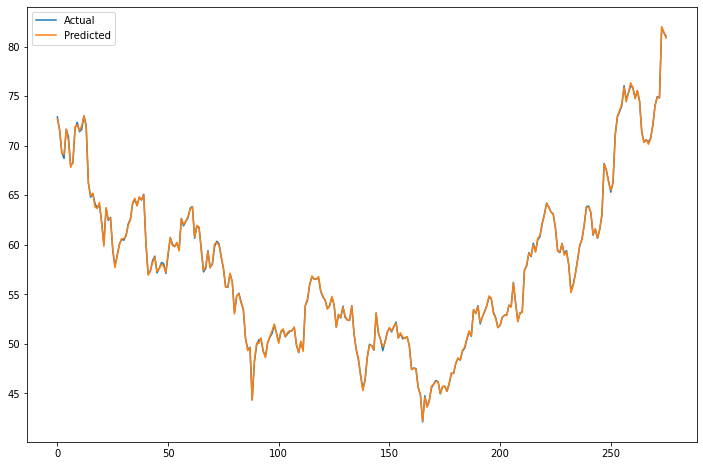

In [26]:
Linear_Regression(X_train_bhpl, Y_train_bhpl, X_test_bhpl, Y_test_bhpl)

### Cipla

LR Coefficients: 
 [-2.04938707e-02  2.08651010e-02  2.68489958e-02  5.21573861e-09
  9.27616431e-06 -6.23393709e-03 -6.27103336e-03 -5.22771005e-01
 -2.78545464e-01 -1.05453329e-01  4.95487254e-03  4.52905847e-03
 -1.18961861e+00 -5.61780608e-01 -6.25248513e-03 -4.87108968e-02
 -3.03209806e-03  2.62536272e-01 -3.76109199e-01  7.37182742e-01
  7.37182742e-01  7.37182742e-01  7.37182742e-01  7.37182742e-01
 -6.14866407e-03  1.35325684e-03 -6.77635725e-12  3.42498656e-02
  4.26089201e-03  1.77015178e-03  1.77015180e-03  5.94410042e-01
  7.43258534e-04 -1.16639500e-03  1.10735234e-04  9.20846913e-05
  9.93848249e-04 -2.29266096e-04 -4.43560113e-04 -1.31956548e-04
  1.77269238e-04  5.24046783e-05  3.66857019e-05 -3.86712330e-04
  8.98569150e-05  1.28994233e-04  3.63288441e-10 -1.22550331e-10
  5.94511195e-03  2.10008030e-02  2.11798856e-03 -2.13506008e-02
  4.78803271e-03 -3.29069162e-03 -1.17105848e-01 -1.50900362e-01
  1.03435220e-01  3.11861474e-01 -9.72306381e-02  2.27657225e-02
  2.78

,Date,Actual,Predicted
0,2021-10-20,905.900024,907.020517
1,2021-10-21,911.549988,911.276076
2,2021-10-22,896.349976,896.766637
3,2021-10-25,901.849976,901.871813
4,2021-10-26,907.500000,907.745647
...,...,...,...
271,2022-11-23,1108.000000,1107.269758
272,2022-11-24,1095.349976,1095.744920
273,2022-11-25,1105.349976,1104.653650
274,2022-11-28,1101.750000,1101.865446


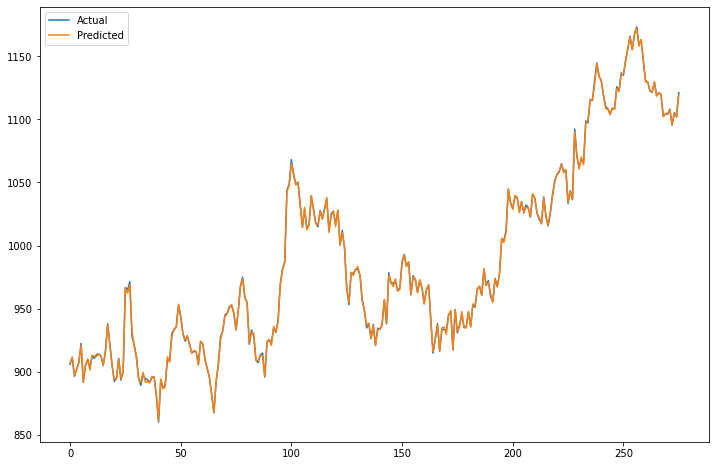

In [28]:
Linear_Regression(X_train_cipla, Y_train_cipla, X_test_cipla, Y_test_cipla)

### Coromandel

LR Coefficients: 
 [-7.80601397e-03  1.88941564e-02  1.52468994e-02  3.17679481e-08
  6.12164247e-06  6.06735946e-06 -1.84080482e-05 -5.29591190e-01
 -2.77704234e-01 -1.09476529e-01 -3.40794430e-03 -4.84293998e-03
 -1.21401812e+00 -5.46330406e-01 -6.17073411e-06 -6.43810798e-02
 -3.81189439e-03  3.47610596e-01 -4.92145392e-01  7.44990932e-01
  7.44990933e-01  7.44990932e-01  7.44990932e-01  7.44990932e-01
 -1.59849329e-02 -9.74707894e-05  3.15467652e-11 -1.07085518e-02
  5.09226591e-03  2.19086021e-03  2.19086021e-03  1.33077590e+00
 -7.70181115e-05 -6.85610555e-04  6.71027863e-05 -8.36895297e-05
 -9.63695918e-04  1.61633470e-03 -3.83784922e-05  7.45570034e-05
  6.95034839e-05  9.52855988e-05  1.01039825e-04  1.38609692e-04
 -4.65950402e-04  3.70807426e-05  2.78612972e-09 -1.01269504e-09
  2.59245467e-03  1.24445918e-02  3.20613362e-02 -9.61964788e-03
 -5.76532964e-03 -5.80542839e-02  1.69414163e-01 -3.30793965e-01
 -1.72625617e-03  2.07856615e-01 -1.41233972e-01 -7.66728575e-03
 -2.79

,Date,Actual,Predicted
0,2021-10-20,835.500000,834.413248
1,2021-10-21,830.650024,830.567376
2,2021-10-22,824.250000,824.773554
3,2021-10-25,814.150024,815.027629
4,2021-10-26,807.900024,808.875111
...,...,...,...
271,2022-11-23,902.750000,903.092581
272,2022-11-24,901.250000,902.268182
273,2022-11-25,920.349976,921.196797
274,2022-11-28,918.650024,919.099667


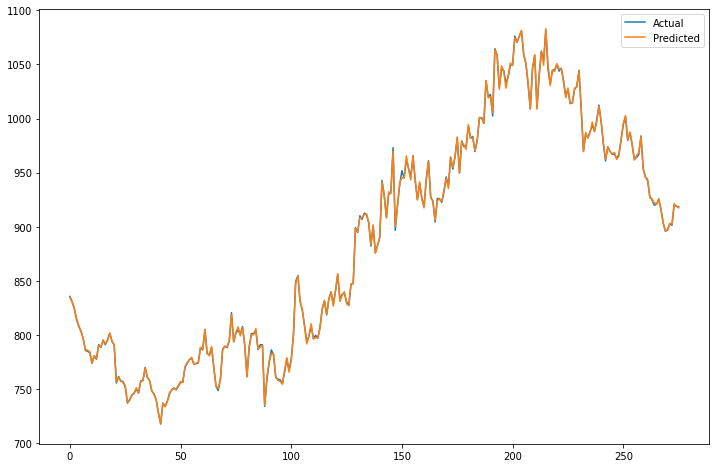

In [27]:
Linear_Regression(X_train_coroml, Y_train_coroml, X_test_coroml, Y_test_coroml)

### TCS

LR Coefficients: 
 [-1.02118835e-02  2.31601215e-02  1.65788942e-02  8.91589936e-08
 -2.76978795e-05  1.73836006e-03  1.84891424e-03 -5.20995147e-01
 -2.79379625e-01 -1.03761440e-01  9.30963115e-04  2.58536657e-03
 -1.18231272e+00 -5.39636845e-01  1.79365254e-03 -6.70483344e-02
 -3.90538900e-03  4.19746375e-01 -5.63533028e-01  7.30190746e-01
  7.30190746e-01  7.30190747e-01  7.30190747e-01  7.30190746e-01
 -8.98090669e-03 -6.05102323e-03 -3.32874894e-10 -4.02241515e-02
  2.04445412e-02  4.05747146e-03  4.05747073e-03 -4.05317747e+00
  2.16423897e-03 -3.62435539e-03  1.65192647e-03  8.50618299e-04
 -3.37411672e-03  3.40650004e-05  2.24548279e-03  1.72514236e-05
  2.11122570e-04 -2.48885569e-04 -1.38740080e-04  8.18159296e-04
  1.40519039e-04 -7.84601938e-04  1.71864549e-09 -3.55927732e-10
  7.39092479e-03  9.21483249e-02 -4.17331734e-02 -9.56096601e-02
 -1.30598067e-03  4.94154886e-01 -3.93429820e-01 -8.49033929e-01
  4.92197783e-01 -3.70740725e-03 -6.37952694e-01  2.37662992e-01
  6.87

,Date,Actual,Predicted
0,2021-10-20,3608.850098,3601.423171
1,2021-10-21,3532.500000,3525.671536
2,2021-10-22,3498.850098,3493.743085
3,2021-10-25,3492.949951,3495.598792
4,2021-10-26,3482.600098,3483.090907
...,...,...,...
271,2022-11-23,3308.300049,3311.267144
272,2022-11-24,3380.149902,3374.905862
273,2022-11-25,3389.649902,3390.919144
274,2022-11-28,3395.250000,3394.264070


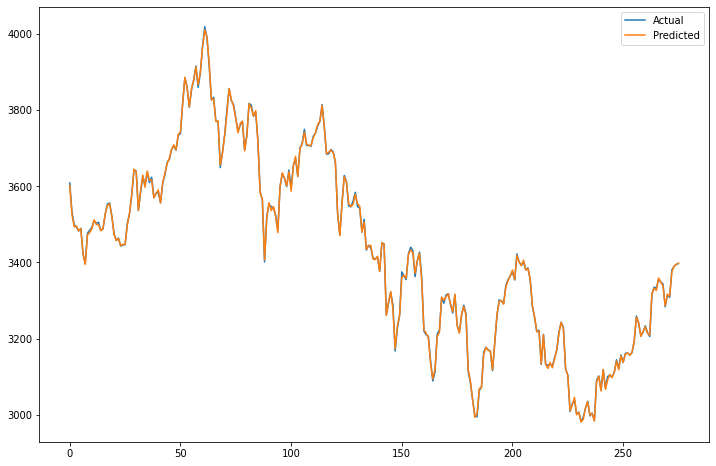

In [29]:
Linear_Regression(X_train_tcs, Y_train_tcs, X_test_tcs, Y_test_tcs)